In [1]:
%%html
<link rel="stylesheet" type="text/css" href="css/rise.css" />

# Leaky Integrate & Fire (LIF) neuron

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = [10,5]
plt.rcParams['lines.linewidth'] = 1.5

### Learning goals - *LIF neuron*
|  |  |  |
|--|--|--|
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will understand how a cell membrane can be described by a RC circuit.</div> |  |
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will understand the concept of the LIF neuron model.</div> |  |
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will be able to simulate a LIF neuron.</div> |  |
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will be able to plot spike rasters.</div> |  |
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will be able to simulate stochastic synaptic input to a LIF neuron.</div> |  |

<img src="images/RC-circuit.jpg" width="100%">

Passive cell membrane RC circuit model:

$I = C \frac{dV}{dt} + g \left( V - E \right)$

$g = \frac{1}{R}$

$C \frac{dV}{dt} = -g \left( V - E \right) + I$

$\tau = R C$

$\tau \frac{dV}{dt} = - \left( V - E \right) + \frac{I}{g}$

Note that a real neuron's membrane has multiple types of conductances such as ion channels that are themselves dynamic (non-constant).

<img src="images/RC-circuit-K-Na-Ca-Cl.jpg" width="40%">

The Leaky Integrate and Fire (LIF) neuron model ignores all of this and approximates the membrane as having a single constant (leak) ocnductance.

<img src="images/RC-circuit.jpg" width="40%">

Leaky Integrate and Fire (LIF) neuron membrane dynamics:

$\tau \frac{dV}{dt} = - \left( V - E \right) + \frac{I}{g}$

Membrane voltage change for single time step $dt$:

$dV = \left( - \left( V - E \right) + \frac{I}{g} \right) \frac{dt}{\tau}$

**Leak:** $g, E$

**Integrate:** $dV, I$

**Fire:** If $V(t) \ge V_{threshold}$:
1. Fire spike at time $t$.
2. $V \rightarrow V_{reset}$ for a defined refractory period.

In [3]:
def LIF_simulation(I, dt, V0=-75, E=-75, g=10, tau=10, V_threshold=-55, V_reset=-75, tau_refractory=2):
    # Default parameters are for a typical neuron:
    # I: injected current (pA)
    # dt: sample interval (ms)
    # V0: initial membrane voltage (mV)
    # E: reversal potential (mV)
    # g: conductance (nS)
    # tau: membrane time constant (ms)
    # V_threshold: spike threshold (mV)
    # V_reset: refractory potential (mV)
    # tau_refractory: refractory time (ms)
    
    # list of spike times
    spike_times = []

    # we will use this to keep track of whether the neuron is in a refractory period
    refractory_time = 0

    # init voltage array for all time steps
    V = np.zeros(I.shape)

    # set the initial voltage
    V[0] = V0

    for i in range(1, len(V)):
        # compute voltage at time step i based on the voltage at time step i-1

        # in refractory period?
        if refractory_time > 0:
            V[i] = V_reset
            refractory_time -= dt
            continue
        
        # change in membrane voltage for ith time step
        dV = ( -(V[i-1] - E) + I[i-1] / g ) * (dt / tau)

        V[i] = V[i-1] + dV

        # spike?
        if V[i] >= V_threshold:
            # record spike time step index (we'll convert to time later)
            spike_times.append(i)
            V[i] = 0  # just so spike is obvious
            # start refractory period
            refractory_time = tau_refractory
    
    # spike time step indices -> times
    spike_times = np.array(spike_times) * dt

    # return LIF neuron membrane voltage time series and array of spike times
    return V, spike_times

Simulate a LIF neuron.

In [4]:
dt = 0.1  # (ms)
time = np.arange(0, 250+dt, dt)
I = np.zeros(time.shape)  # (pA)
I[(time >= 40) & (time < 100)] = 150
I[(time >= 140) & (time < 200)] = 300

V, spike_times = LIF_simulation(I, dt)

In [5]:
def LIF_plot(time, I, V):
    plt.subplot(2, 1, 1)
    plt.plot(time, I)
    plt.ylabel('Current (pA)')
    plt.subplot(2, 1, 2)
    plt.plot(time, V)
    plt.xlabel('Time (ms)')
    plt.ylabel('Voltage (mV)');

array([150.9, 163.9, 176.9, 189.9])

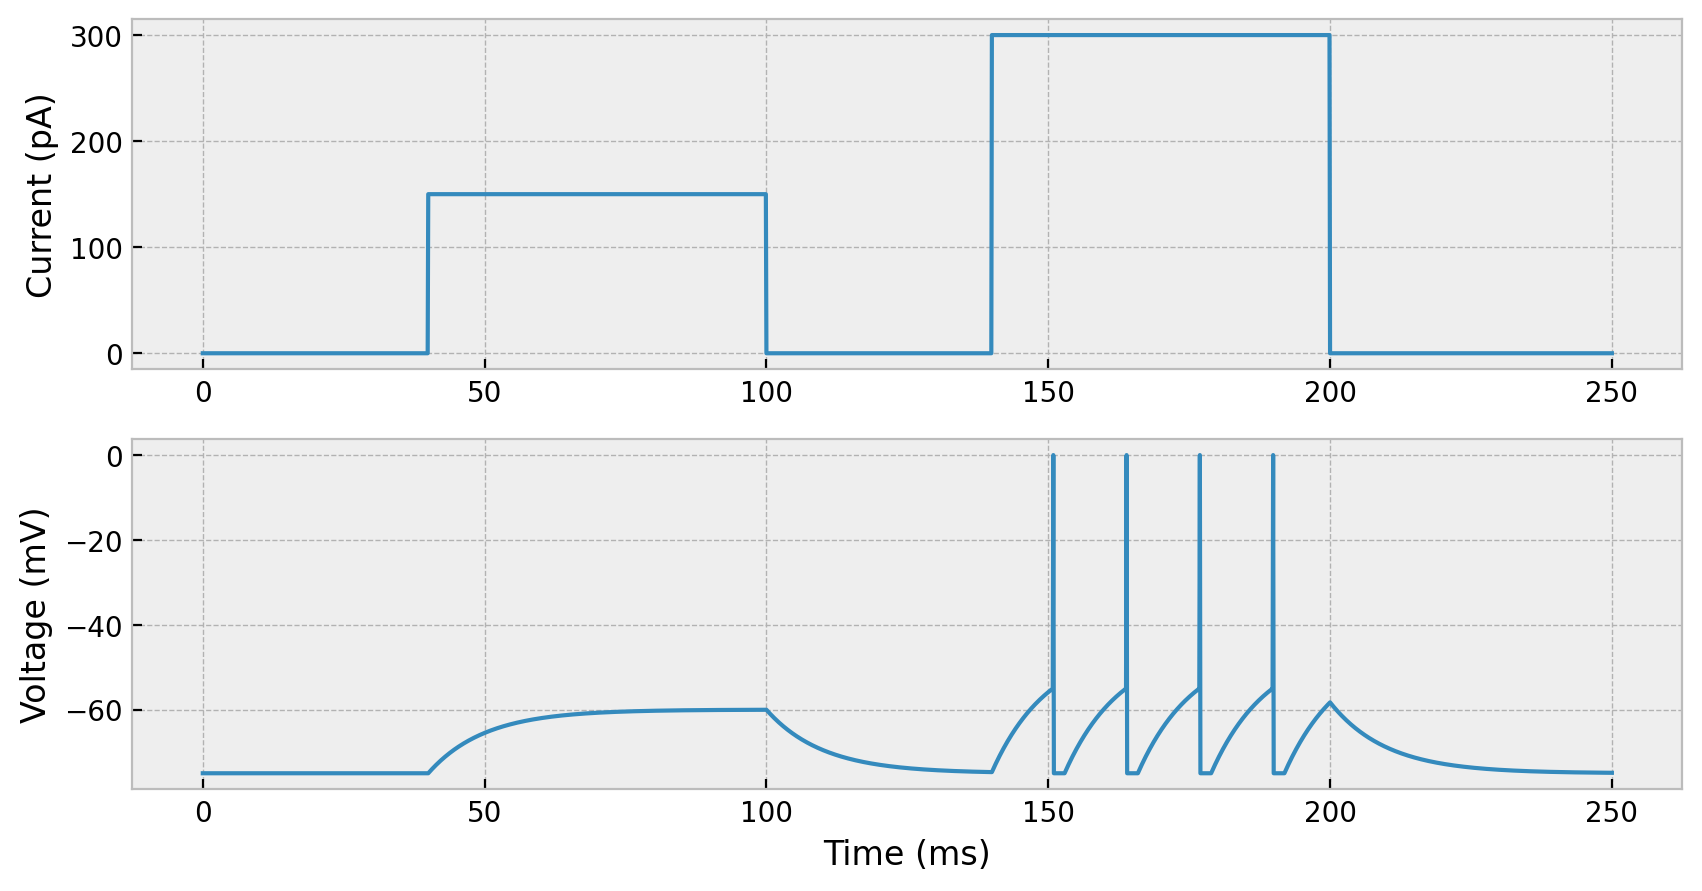

In [6]:
LIF_plot(time, I, V)
spike_times

# Exercise

Use the default LIF neuron parameters to simulate injecting a current ramp from 0 to 1000 pA over 500 ms.

In [ ]:
dt = 0.1  # (ms)
time = np.arange(0, 500+dt, dt)
I = ...
V, spike_times = LIF_simulation(I, dt)
LIF_plot(time, I, V)

# Exercise Key

Use the default LIF neuron parameters to simulate injecting a current ramp from 0 to 1000 pA over 500 ms.

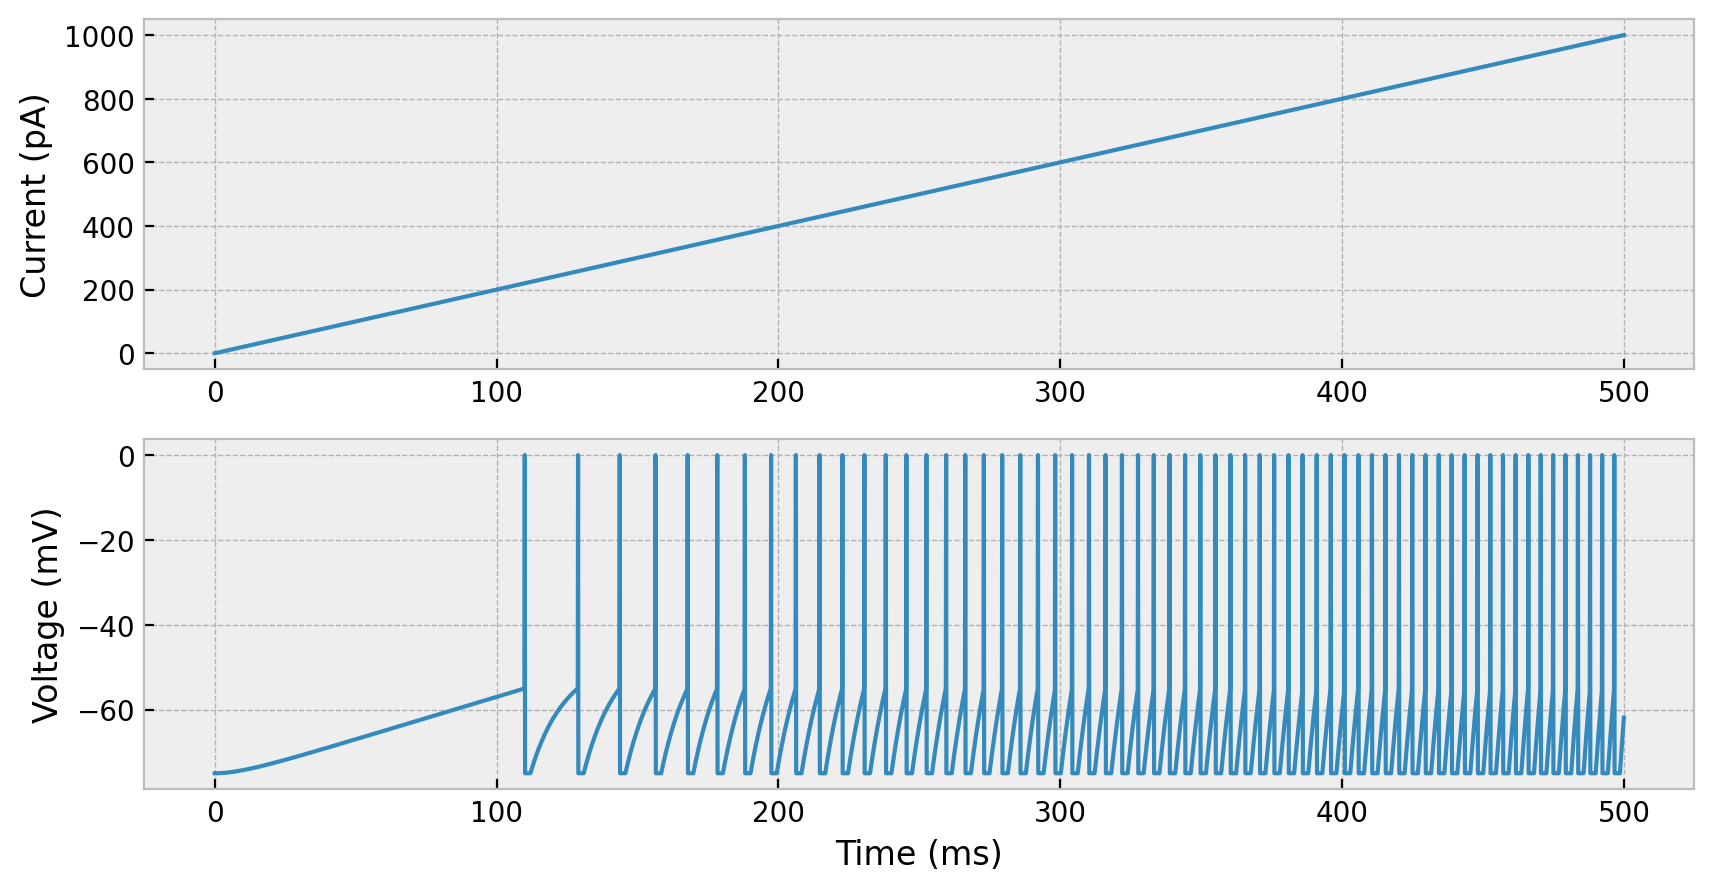

In [8]:
dt = 0.1  # (ms)
time = np.arange(0, 500+dt, dt)
I = np.linspace(0, 1000, len(time))
V, spike_times = LIF_simulation(I, dt)
LIF_plot(time, I, V)

# Exercise

Use the default LIF neuron parameters to simulate injecting five cycles of a sinusoidal current with amplitude 500 pA and cycle period 100 ms.

*Hint: $sin(2 \pi \omega t)$*

In [ ]:
dt = 0.1  # (ms)
time = np.arange(0, 500+dt, dt)
I = ...
V, spike_times = LIF_simulation(I, dt)
LIF_plot(time, I, V)

# Exercise Key

Use the default LIF neuron parameters to simulate injecting five cycles of a sinusoidal current with amplitude 500 pA and cycle period 100 ms.

*Hint: $sin(2 \pi \omega t)$*

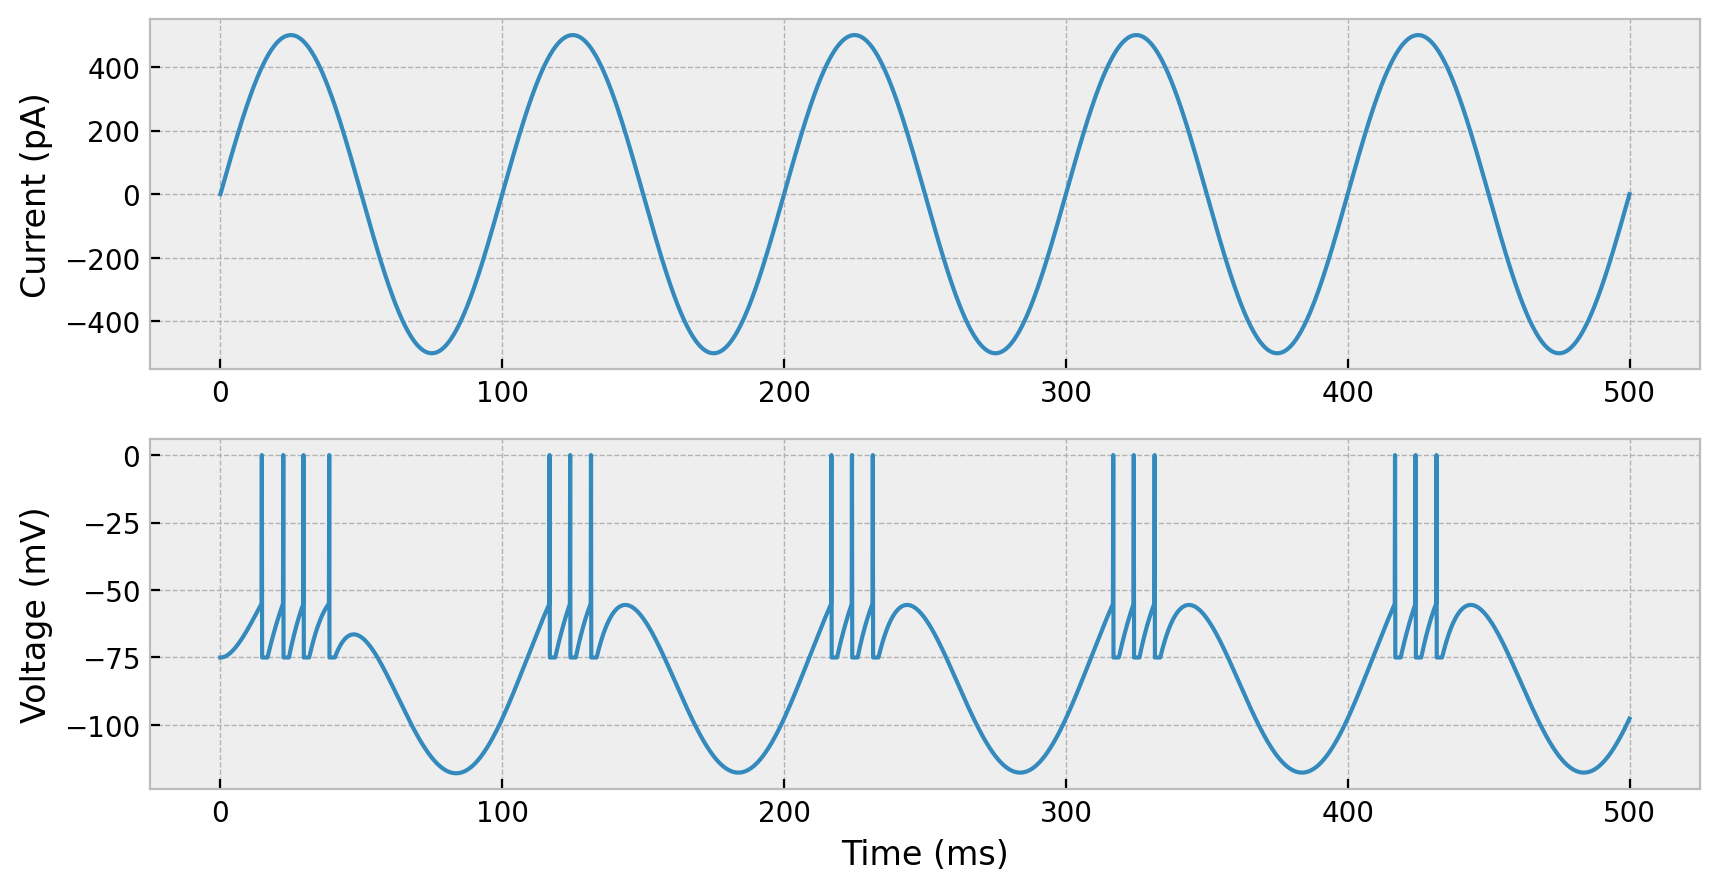

In [10]:
dt = 0.1  # (ms)
time = np.arange(0, 500+dt, dt)
I = 500 * np.sin(2 * np.pi / 100 * time)
V, spike_times = LIF_simulation(I, dt)
LIF_plot(time, I, V)

# Exercise

Use the default LIF neuron parameters to simulate injecting a step current of 400 pA plus Gaussian noise with a standard deviation of 300 pA for a duration of 100 ms.

Also compute the neuron's spike rate from the simulation.

In [ ]:
dt = 0.1  # (ms)
time = np.arange(0, 100+dt, dt)
I = ...
V, spike_times = LIF_simulation(I, dt)
LIF_plot(time, I, V)
f"Spike rate = {... :.1f} Hz"

# Exercise Key

Use the default LIF neuron parameters to simulate injecting a step current of 400 pA plus Gaussian noise with a standard deviation of 300 pA for a duration of 100 ms.

Also compute the neuron's spike rate from the simulation.

'Spike rate = 110.0 Hz'

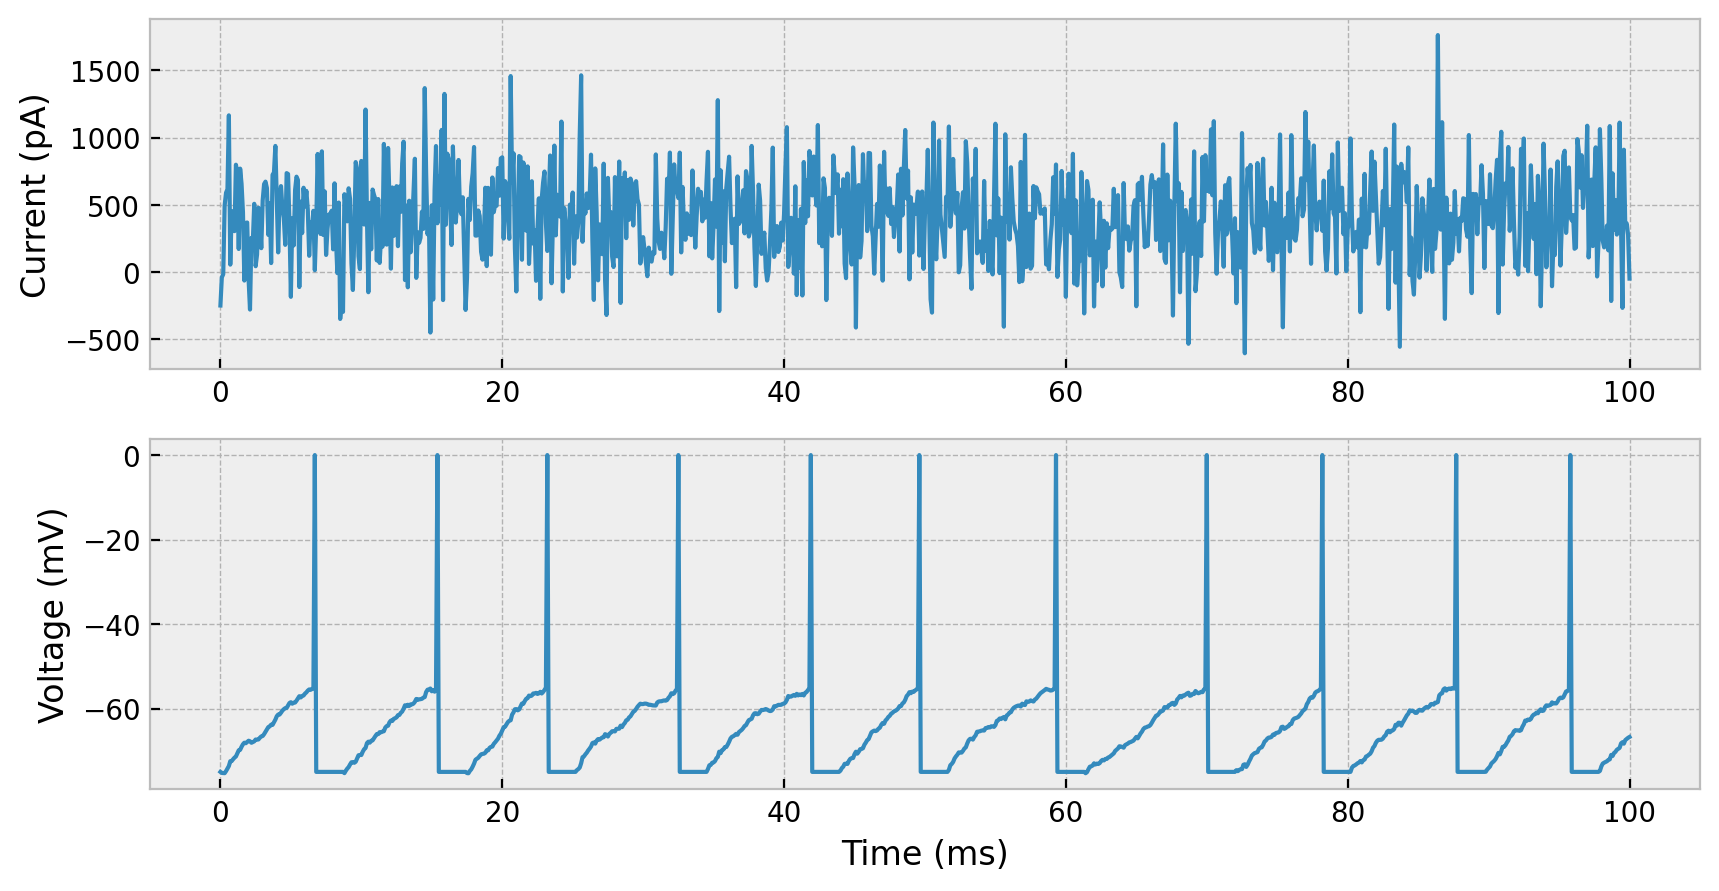

In [12]:
dt = 0.1  # (ms)
time = np.arange(0, 100+dt, dt)
I = 400 + 300 * np.random.randn(len(time))
V, spike_times = LIF_simulation(I, dt)
LIF_plot(time, I, V)
f"Spike rate = {len(spike_times) / 0.1 :.1f} Hz"

Let's do slightly better than a simple leaky membrane.

Imagine the neuron is recieving input from other neurons via many synapses, with some portion of the synapses being excitatory (e.g., glutamatergic) and some inhibitory (e.g., GABAergic).

To simplify simulating these synaptic inputs let's assume that all of the inputs arrive at an average rate of 10 Hz (i.e., the presynaptic spike rate).

For spikes arriving at an average rate of 10 Hz, what distribution would you use to simulate the number of spikes that arrive within some simulation time window?

In [13]:
from scipy.stats import poisson

# simulation time steps
dt = 0.1  # (ms)
time = np.arange(0, 400+dt, dt)

# presynaptic neurons average spike rate
n_neurons = 100
spike_rate = 10  # (Hz)

# average spike rate per time step
spike_rate_per_dt = spike_rate / 1000.0 * dt

# probabilities in [0,1) for each neuron (row) and each time point (column)
urand = np.random.uniform(0, 1, size=[n_neurons, len(time)])

# stochastic number of input spikes for each neuron (row) and each time point (column)
# For small spike_rate_per_dt this will mostly be zeros with one or a few spikes every now and then.
presynaptic_spikes = poisson.ppf(urand, spike_rate_per_dt)

Plot input presynaptic spike trains as a raster plot.

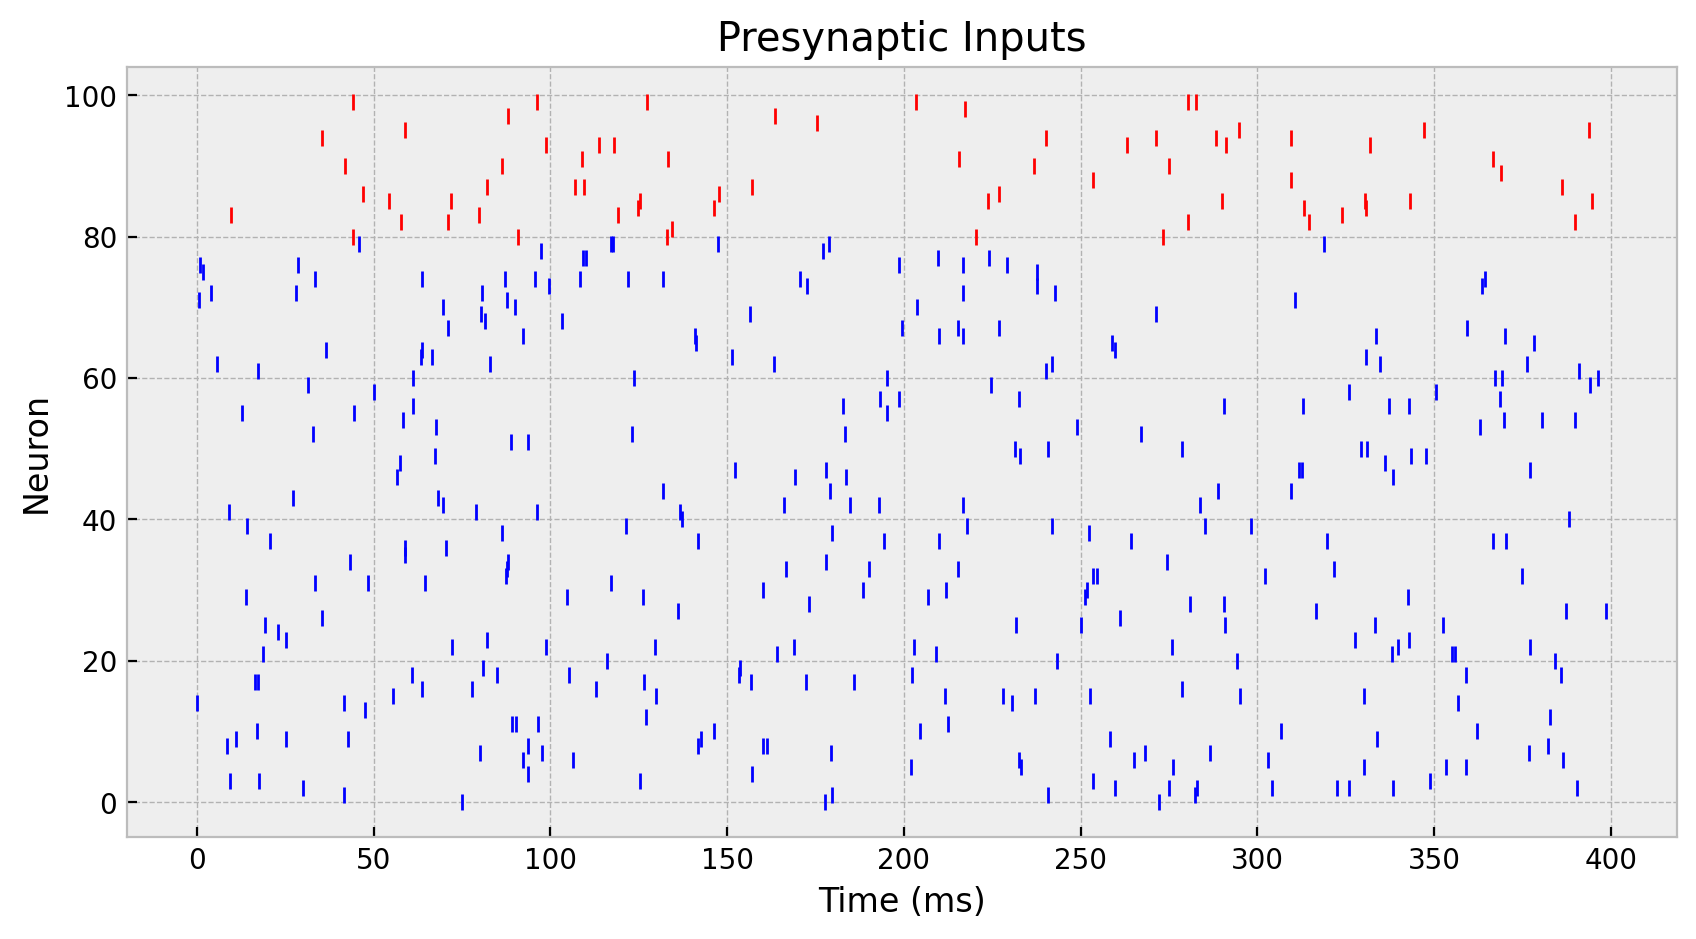

In [14]:
for i in range(n_neurons):
    # number of spikes for each time step coming from neuron i
    spikes = presynaptic_spikes[i]

    # neuron i spike times
    spike_times = time[spikes > 0]

    # plot a | for each spike in row i
    x = spike_times
    y = np.ones(spike_times.shape) * i  # row i
    if i < 80:
        plt.plot(x, y, 'b|')
    else:
        plt.plot(x, y, 'r|')
plt.xlabel('Time (ms)')
plt.ylabel('Neuron')
plt.title('Presynaptic Inputs');

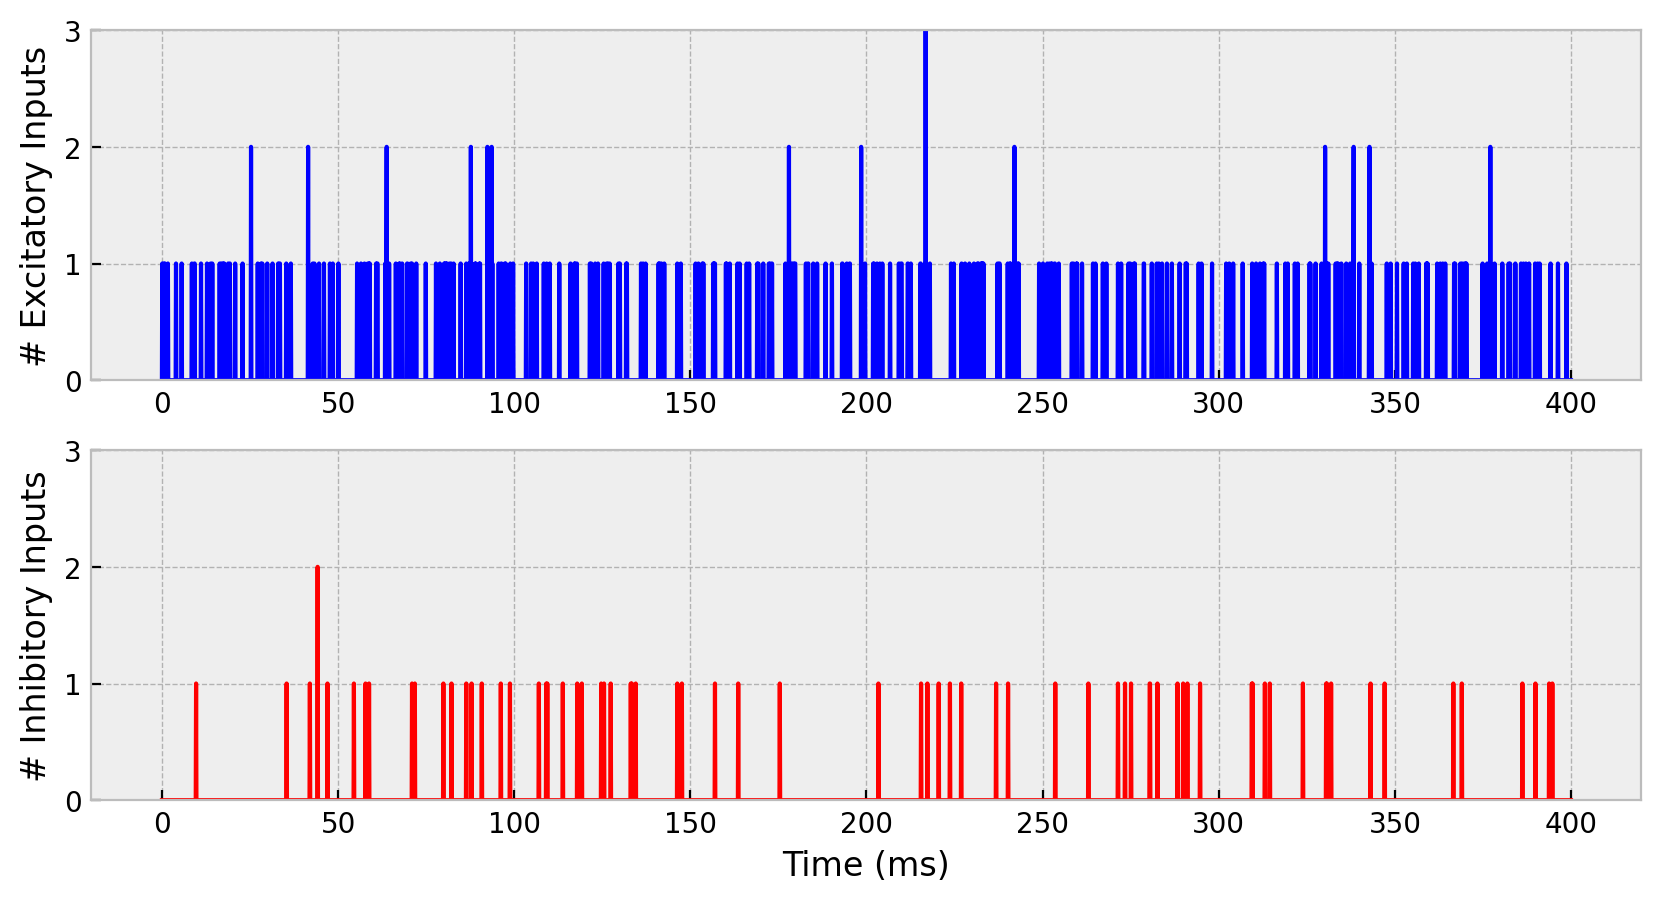

In [15]:
excitatory_spikes = presynaptic_spikes[:80]
inhibitory_spikes = presynaptic_spikes[80:]

# total number of spikes from all input neurons per time step
NE = excitatory_spikes.sum(axis=0)
NI = inhibitory_spikes.sum(axis=0)

plt.subplot(2, 1, 1)
plt.plot(time, NE, 'b', label='excitatory')
Nmax = max(NE.max(), NI.max())
plt.ylim([0, Nmax])
plt.yticks(np.arange(Nmax+1))
plt.ylabel('# Excitatory Inputs')
plt.subplot(2, 1, 2)
plt.plot(time, NI, 'r')
plt.ylim([0, Nmax])
plt.yticks(np.arange(Nmax+1))
plt.xlabel('Time (ms)')
plt.ylabel('# Inhibitory Inputs');

Ok, so now we have simulated a bunch of excitatory and inhibitory synaptic inputs from presynaptic neurons.

How do we make our neuron respond to those inputs?

We will add excitatory and inhibitory conductances to our membrane model and have those conductances be driven by the input spikes.

This is the same as above with $g_L$ indicating that it is a leak conductance.

$I = C \frac{dV}{dt} + g_L \left( V - E_L \right)$

Now add excitatory ($g_E$) and inhibitory ($g_I$) conductances.

$I = C \frac{dV}{dt} + g_L \left( V - E_L \right) + g_E \left( V - E_E \right) + g_I \left( V - E_I \right)$

Rearrange as before:

$C \frac{dV}{dt} = -g_L \left( V - E_L \right) - g_E \left( V - E_E \right) - g_I \left( V - E_I \right) + I$

$\tau \frac{dV}{dt} = - \left( V - E_L \right) - \frac{g_E}{g_L} \left( V - E_E \right) - \frac{g_I}{g_L} \left( V - E_I \right) + \frac{I}{g_L}$

This now describes the membrane dynamics of our LIF neuron with additional excitatory and inhibitory conductances.

!!! However, unlike the leak, the excitatory and inhibitory conductances are NOT constant in time.

$\tau \frac{dV}{dt} = - \left( V - E_L \right) - \frac{g_E}{g_L} \left( V - E_E \right) - \frac{g_I}{g_L} \left( V - E_I \right) + \frac{I}{g_L}$

Imagine that each time the neuron recieves an input via one of its excitatory (inhibitory) synapses, $g_E$ ($g_I$) increases by $s_E$ ($s_I$).

Thus, $s_E$ ($s_I$) are the excitatory (inhibitory) synaptic strengths.

They describe the neuron's postsynaptic current response to a presynaptic spike.

For simplicity, in addition to having the same input spike rates, we also assume that all excitatory (inhibitory) synapses have identical postsynaptic responses to those inputs.

Of course, you can imagine a more complex model where this is not the case, but for now...

Now our job is to define how the time-dependent conductances $g_E$ and $g_I$ should evolve in time.

In general this can be a complex function of the time-dependent behavior of all sorts of ionic conductances shaped by things like diffusion of neurotransmitter in the synapse and the time course of the response of postsynaptic ion channels.

For simplicity, let's describe the neuron's response to an input spike as an exponentially decaying conductance with some time constant that may differ between excitatory and inhibitory synapses. This grossly approximates the rapid opening and slower decay of postsynaptic neurotransmitter-gated ion channels.

The following equations describe an exponentially decaying $g_E$ and $g_I$ with time constant $\tau_E$ and $\tau_I$, respectively. Revisit your basic calculus!

$\frac{dg_E}{dt} = -\frac{g_E}{\tau_E}$

$\frac{dg_I}{dt} = -\frac{g_I}{\tau_I}$

Only considering their decay, the change in conductance per time step $dt$ is:

$dg_E = -g_E \frac{dt}{\tau_E}$

$dg_I = -g_I \frac{dt}{\tau_I}$

But we also want $g_E$ and $g_I$ to respond to the input spikes by increasing by the amount $s_E$ or $s_I$ per spike, respectively.

For a number $N_E$ ($N_I$) of excitatory (inhibitory) synaptic inputs in a given time interval $dt$, the change in conductance is:

$dg_E = -g_E \frac{dt}{\tau_E} + N_E s_E$

$dg_I = -g_I \frac{dt}{\tau_I} + N_I s_I$

Our full model for the neuron's membrane dynamics:

$\tau \frac{dV}{dt} = - \left( V - E_L \right) - \frac{g_E}{g_L} \left( V - E_E \right) - \frac{g_I}{g_L} \left( V - E_I \right) + \frac{I}{g_L}$

Rearrange to get change in membrane voltage per time step $dt$:

$dV = \left( - \left( V - E_L \right) - \frac{g_E}{g_L} \left( V - E_E \right) - \frac{g_I}{g_L} \left( V - E_I \right) + \frac{I}{g_L} \right) \frac{dt}{\tau}$

And change in excitatory and inhibitory conductances per time step $dt$:

$dg_E = -g_E \frac{dt}{\tau_E} + N_E s_E$

$dg_I = -g_I \frac{dt}{\tau_I} + N_I s_I$

In [16]:
def LIF_synaptic(dt, I, 
                spikesE, spikesI, sE=1.2, sI=1.6, tauE=5, tauI=10, EE=0, EI=-80, 
                V0=-75, EL=-75, gL=10, tau=10, V_threshold=-55, V_reset=-75, tau_refractory=2):
    # dt: sample interval (ms)
    # I: injected current (pA)
    # spikes_E: # of excitatory synaptic inputs per sample interval (each row is a neuron)
    # spikes_I: # of inhibitory synaptic inputs per sample interval (each row is a neuron)
    # s_E: excitatory synaptic strength (nS)
    # s_I: inhibitory synaptic strength (nS)
    # tau_E: excitatory synaptic time constant (ms)
    # tau_I: inhibitory synaptic time constant (ms)
    # E_E: excitatory reversal potential (mV)
    # E_I: inhibitory reversal potential (mV)
    # V0: initial membrane voltage (mV)
    # E_L: leak reversal potential (mV)
    # g_L: leak conductance (nS)
    # tau: membrane time constant (ms)
    # V_threshold: spike threshold (mV)
    # V_reset: refractory potential (mV)
    # tau_refractory: refractory time (ms)
    
    # total number of spikes from all input neurons per time step
    NE = spikesE.sum(axis=0)
    NI = spikesI.sum(axis=0)

    # time dependent excitatory and inhibitory conductances
    # these will be computed from the input spike trains
    gE = np.zeros(NE.shape)
    gI = np.zeros(NI.shape)

    # LIF neuron
    spike_times = []
    refractory_time = 0
    V = np.zeros(NE.shape)
    V[0] = V0
    for i in range(1, len(V)):
        # update the synaptic conductances
        gE[i] = gE[i-1] - gE[i-1] * (dt / tauE) + NE[i] * sE
        gI[i] = gI[i-1] - gI[i-1] * (dt / tauI) + NI[i] * sI

        # in refractory period?
        if refractory_time > 0:
            V[i] = V_reset
            refractory_time -= dt
            continue
        
        # change in membrane voltage for ith time step
        dV = (
            -(V[i-1] - EL) 
            - gE[i-1] / gL * (V[i-1] - EE) 
            - gI[i-1] / gL * (V[i-1] - EI) 
            + I[i-1] / gL
            ) * (dt / tau)

        V[i] = V[i-1] + dV

        # spike?
        if V[i] >= V_threshold:
            spike_times.append(i)
            V[i] = 0  # just so spike is obvious
            refractory_time = tau_refractory
    
    spike_times = np.array(spike_times) * dt

    return V, spike_times, gE, gI

Simulate the neuron's response to the synaptic inputs.

In [17]:
dt = 0.1  # (ms)
time = np.arange(0, 400+dt, dt)
n_neurons = 100
spike_rate = 10  # (Hz)
spike_rate_per_dt = spike_rate / 1000.0 * dt
presynaptic_spikes = poisson.ppf(np.random.uniform(0, 1, size=[n_neurons, len(time)]), spike_rate_per_dt)
excitatory_spikes = presynaptic_spikes[:80]
inhibitory_spikes = presynaptic_spikes[80:]
I = np.zeros(time.shape)  # no injected current

V, spike_times, gE, gI = LIF_synaptic(dt, I, excitatory_spikes, inhibitory_spikes)

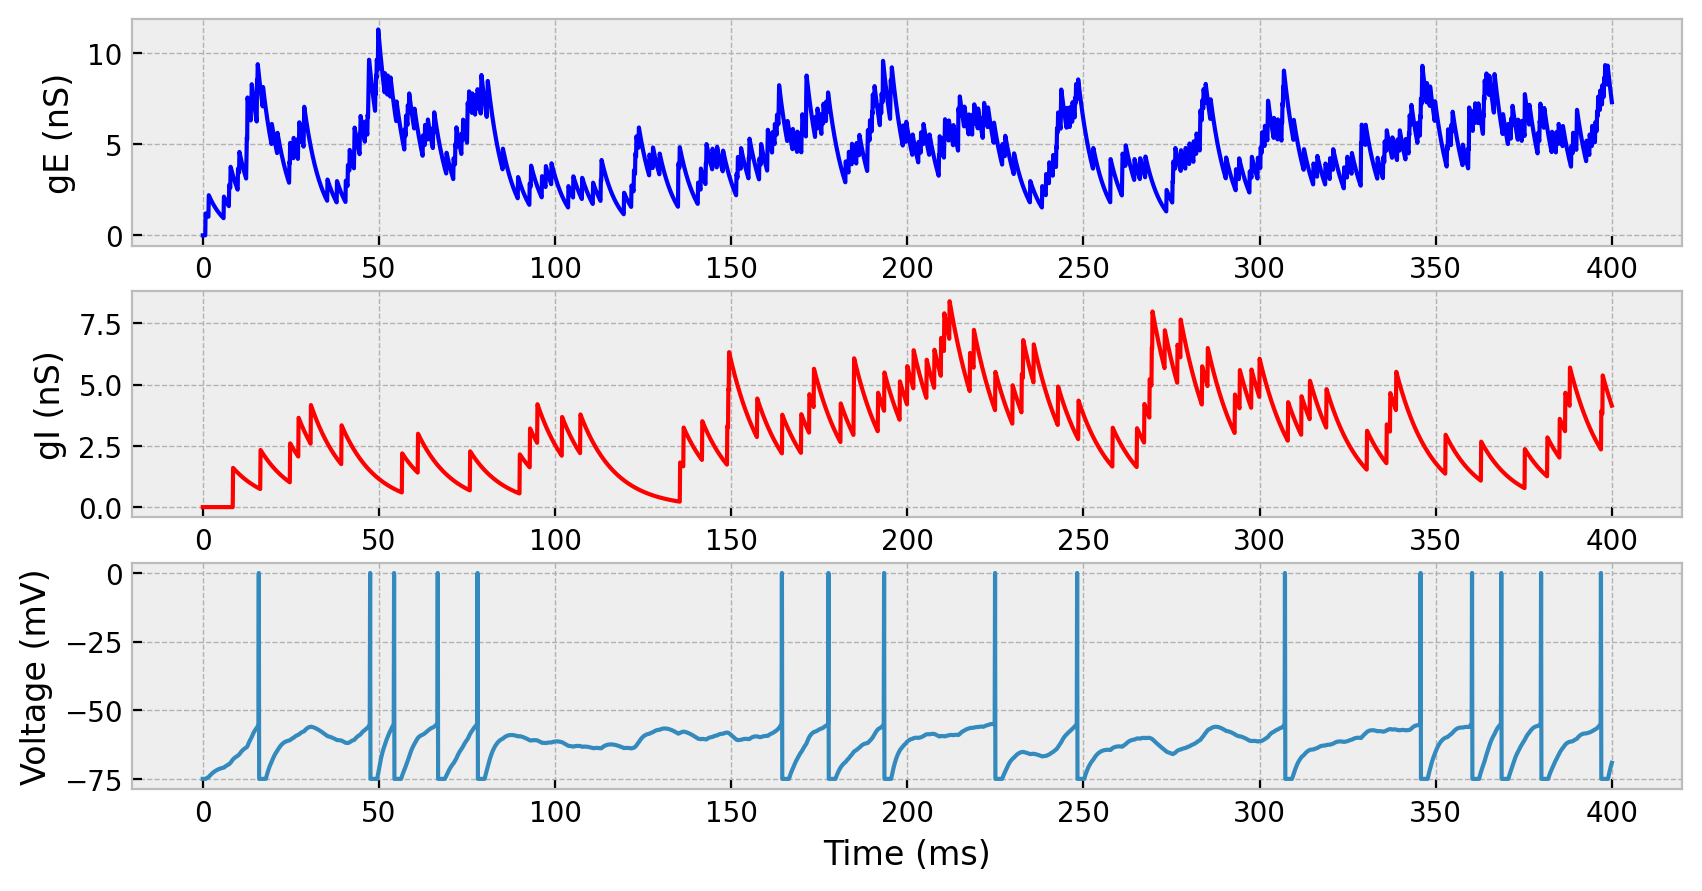

In [18]:
plt.subplot(3, 1, 1)
plt.plot(time, gE, 'b')
plt.ylabel('gE (nS)')
plt.subplot(3, 1, 2)
plt.plot(time, gI, 'r')
plt.ylabel('gI (nS)')
plt.subplot(3, 1, 3)
plt.plot(time, V)
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)');

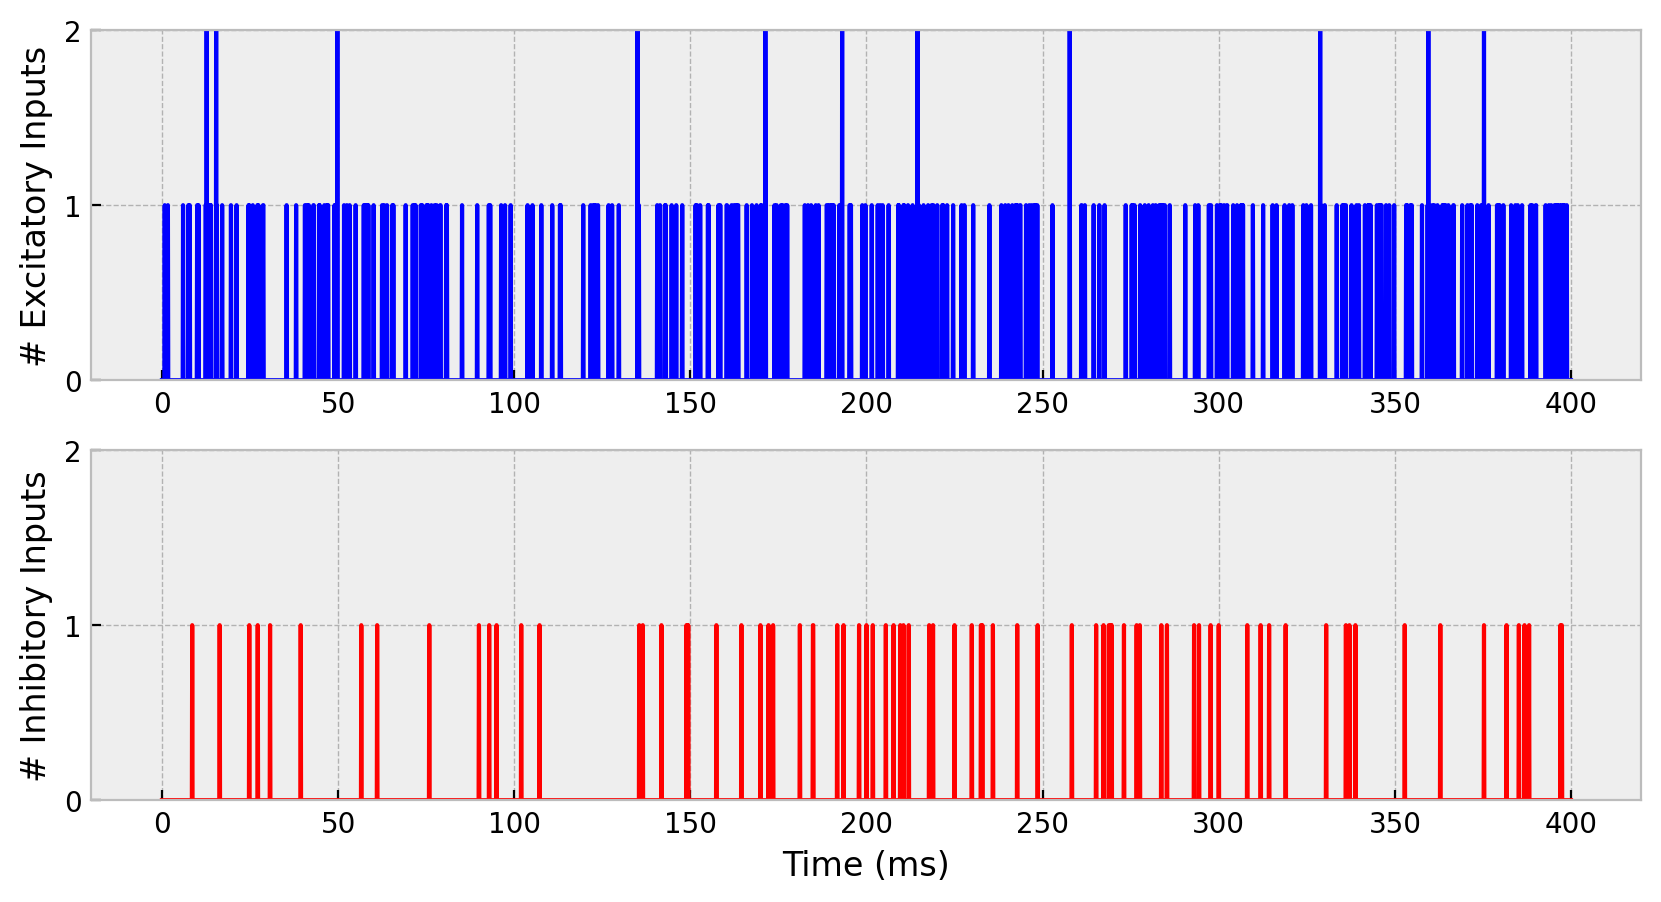

In [19]:
# total number of spikes from all input neurons per time step
NE = excitatory_spikes.sum(axis=0)
NI = inhibitory_spikes.sum(axis=0)

plt.subplot(2, 1, 1)
plt.plot(time, NE, 'b', label='excitatory')
Nmax = max(NE.max(), NI.max())
plt.ylim([0, Nmax])
plt.yticks(np.arange(Nmax+1))
plt.ylabel('# Excitatory Inputs')
plt.subplot(2, 1, 2)
plt.plot(time, NI, 'r')
plt.ylim([0, Nmax])
plt.yticks(np.arange(Nmax+1))
plt.xlabel('Time (ms)')
plt.ylabel('# Inhibitory Inputs');

Consider each synapses impulse response to a single presynaptic spike.

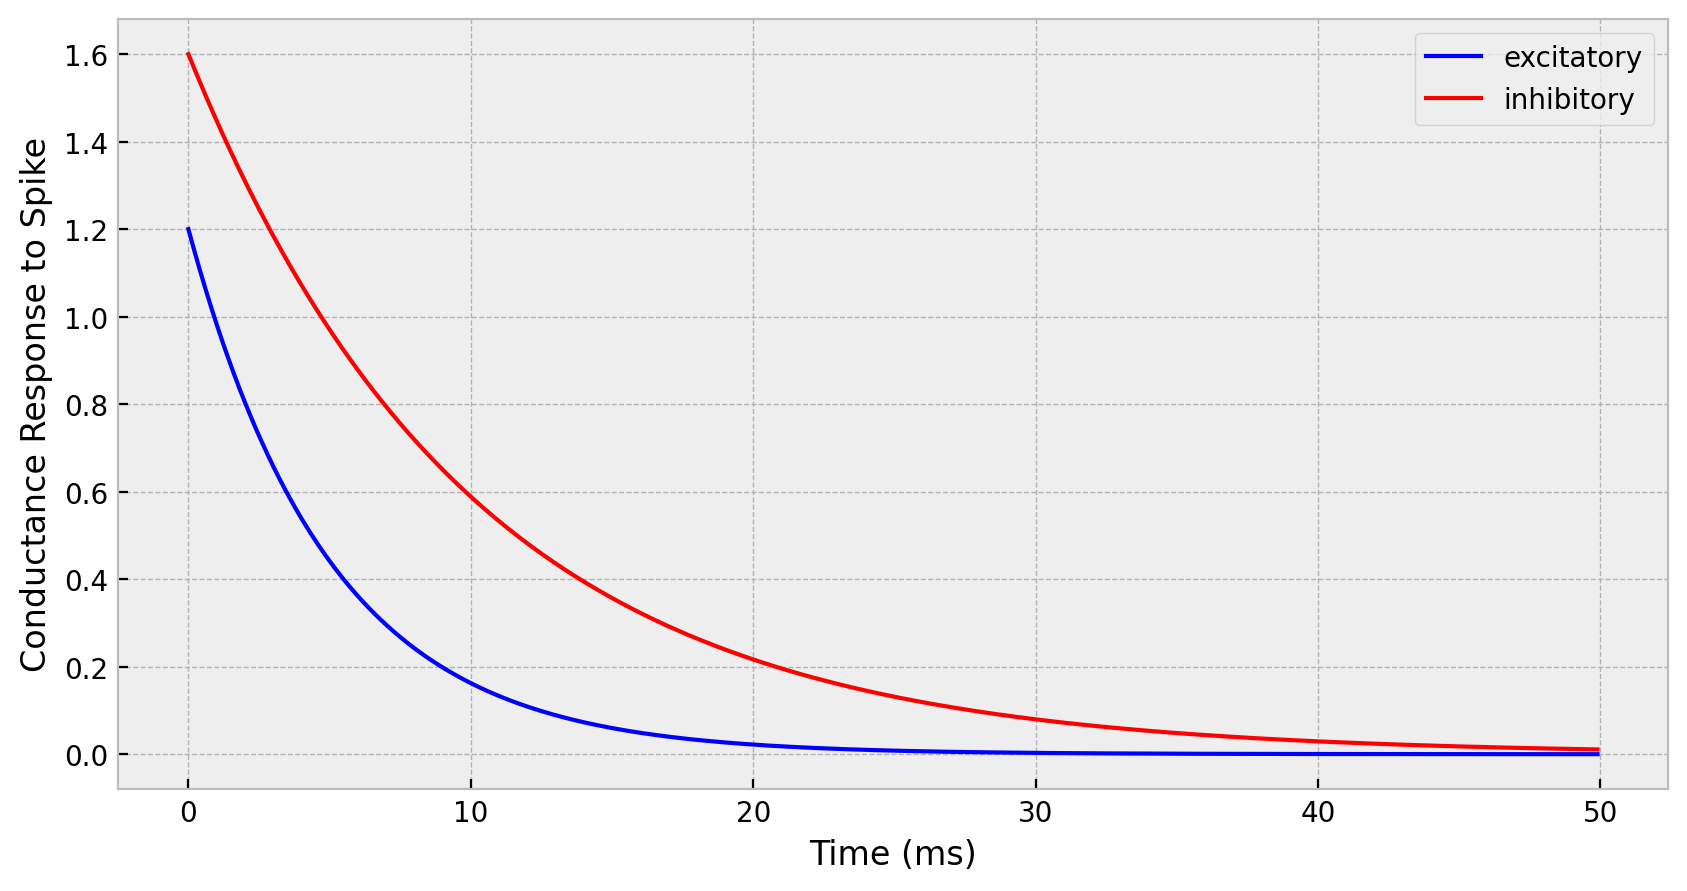

In [20]:
# impulse response to each excitatory or inhibitory spike
sE=1.2
sI=1.6
tauE=5
tauI=10

t = np.arange(500) * dt

excitatory_spike_response = sE * np.exp(-t / tauE)
inhibitory_spike_response = sI * np.exp(-t / tauI)

plt.plot(t, excitatory_spike_response, 'b', label='excitatory')
plt.plot(t, inhibitory_spike_response, 'r', label='inhibitory')
plt.xlabel('Time (ms)')
plt.ylabel('Conductance Response to Spike')
plt.legend();

Convolve the synaptic impulse response with the incoming spike train to get the excitatory and inhibitory conductance time series.

In [21]:
gE_conv = np.convolve(NE, excitatory_spike_response)[:len(NE)]
gI_conv = np.convolve(NI, inhibitory_spike_response)[:len(NI)]

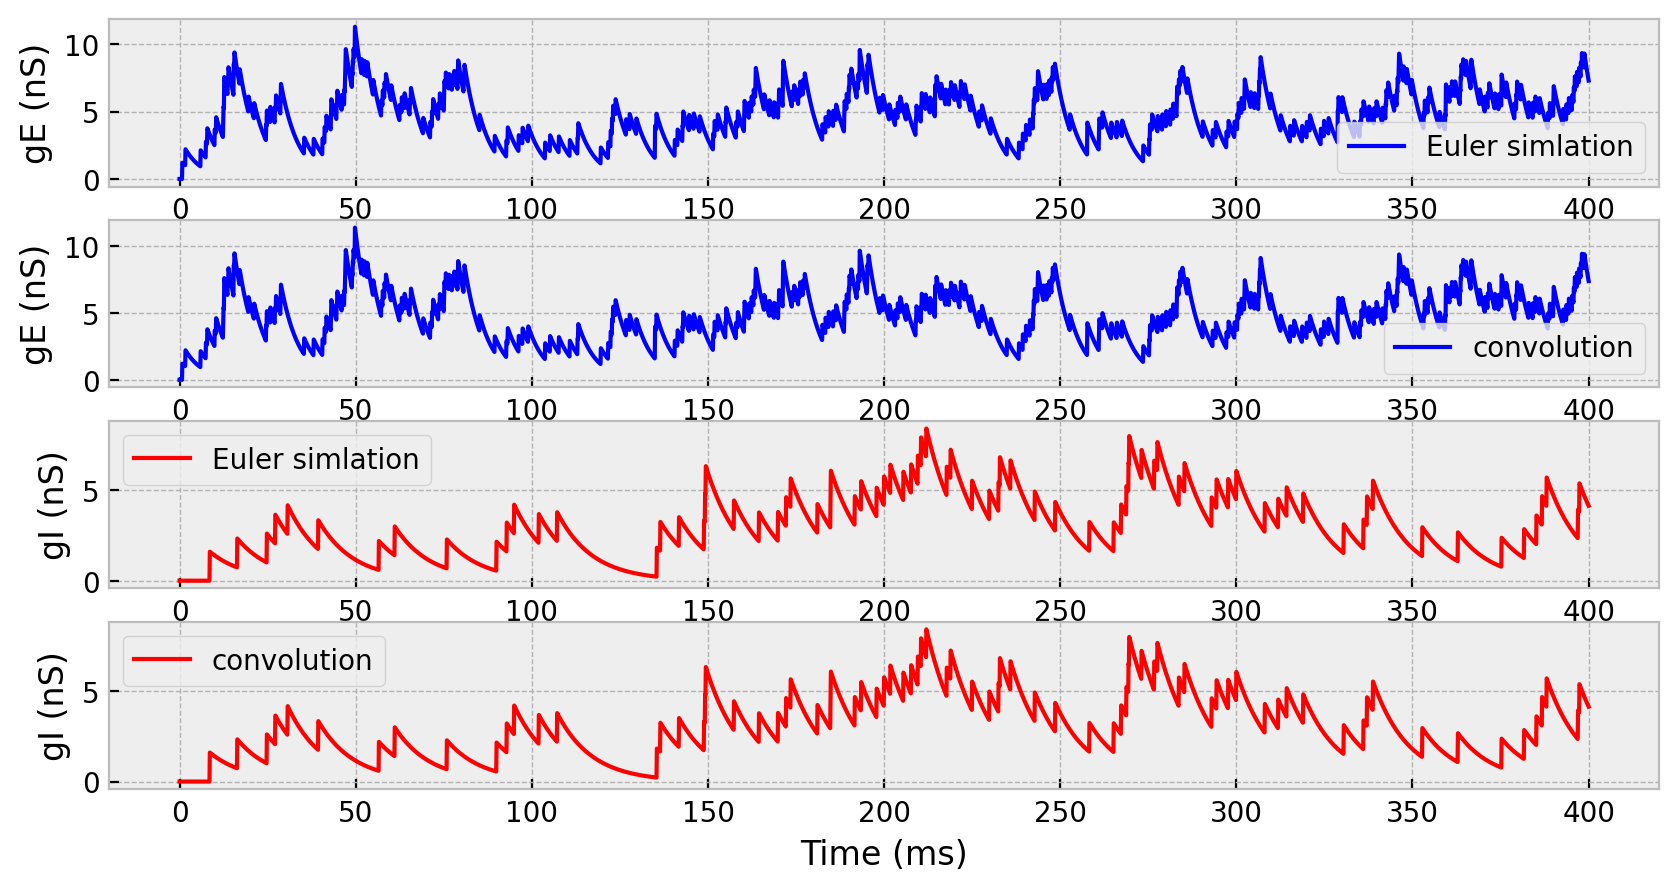

In [22]:
plt.subplot(4, 1, 1)
plt.plot(time, gE, 'b', label='Euler simlation')
plt.ylabel('gE (nS)')
plt.legend()
plt.subplot(4, 1, 2)
plt.plot(time, gE_conv, 'b', label='convolution')
plt.ylabel('gE (nS)')
plt.legend()
plt.subplot(4, 1, 3)
plt.plot(time, gI, 'r', label='Euler simlation')
plt.ylabel('gI (nS)')
plt.legend()
plt.subplot(4, 1, 4)
plt.plot(time, gI, 'r', label='convolution')
plt.ylabel('gI (nS)')
plt.legend()
plt.xlabel('Time (ms)');

Redo the simulation code using convolution to define the synaptic conductances.

In [23]:
def LIF_synaptic_conv(dt, I, 
                spikesE, spikesI, sE=1.2, sI=1.6, tauE=5, tauI=10, EE=0, EI=-80, 
                V0=-75, EL=-75, gL=10, tau=10, V_threshold=-55, V_reset=-75, tau_refractory=2):
    # dt: sample interval (ms)
    # I: injected current (pA)
    # spikes_E: # of excitatory synaptic inputs per sample interval (each row is a neuron)
    # spikes_I: # of inhibitory synaptic inputs per sample interval (each row is a neuron)
    # s_E: excitatory synaptic strength (nS)
    # s_I: inhibitory synaptic strength (nS)
    # tau_E: excitatory synaptic time constant (ms)
    # tau_I: inhibitory synaptic time constant (ms)
    # E_E: excitatory reversal potential (mV)
    # E_I: inhibitory reversal potential (mV)
    # V0: initial membrane voltage (mV)
    # E_L: leak reversal potential (mV)
    # g_L: leak conductance (nS)
    # tau: membrane time constant (ms)
    # V_threshold: spike threshold (mV)
    # V_reset: refractory potential (mV)
    # tau_refractory: refractory time (ms)
    
    # total number of spikes from all input neurons per time step
    NE = spikesE.sum(axis=0)
    NI = spikesI.sum(axis=0)

    # time dependent excitatory and inhibitory conductances
    gE = np.convolve(NE, excitatory_spike_response)[:len(NE)]
    gI = np.convolve(NI, inhibitory_spike_response)[:len(NI)]

    # LIF neuron
    spike_times = []
    refractory_time = 0
    V = np.zeros(NE.shape)
    V[0] = V0
    for i in range(1, len(V)):
        # in refractory period?
        if refractory_time > 0:
            V[i] = V_reset
            refractory_time -= dt
            continue
        
        # change in membrane voltage for ith time step
        dV = (
            -(V[i-1] - EL) 
            - gE[i-1] / gL * (V[i-1] - EE) 
            - gI[i-1] / gL * (V[i-1] - EI) 
            + I[i-1] / gL
            ) * (dt / tau)

        V[i] = V[i-1] + dV

        # spike?
        if V[i] >= V_threshold:
            spike_times.append(i)
            V[i] = 0  # just so spike is obvious
            refractory_time = tau_refractory
    
    spike_times = np.array(spike_times) * dt

    return V, spike_times, gE, gI

Simulate again (should tbe the same as before).

In [24]:
dt = 0.1  # (ms)
time = np.arange(0, 400+dt, dt)
n_neurons = 100
spike_rate = 10  # (Hz)
spike_rate_per_dt = spike_rate / 1000.0 * dt
presynaptic_spikes = poisson.ppf(np.random.uniform(0, 1, size=[n_neurons, len(time)]), spike_rate_per_dt)
excitatory_spikes = presynaptic_spikes[:80]
inhibitory_spikes = presynaptic_spikes[80:]
I = np.zeros(time.shape)

V, spike_times, gE, gI = LIF_synaptic_conv(dt, I, excitatory_spikes, inhibitory_spikes)

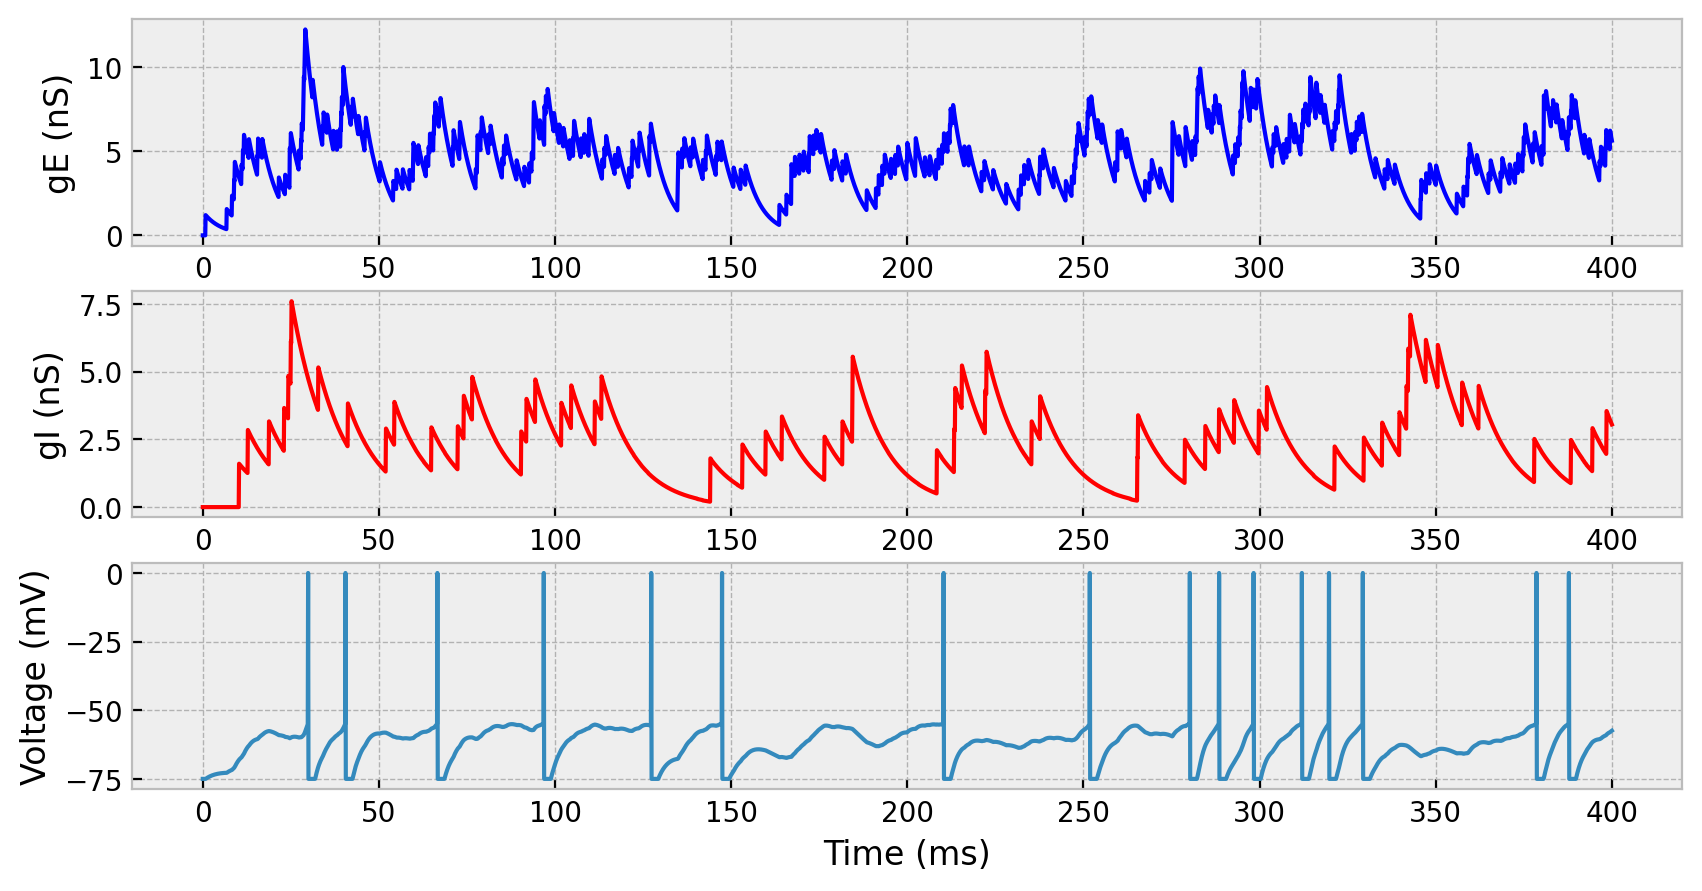

In [25]:
plt.subplot(3, 1, 1)
plt.plot(time, gE, 'b')
plt.ylabel('gE (nS)')
plt.subplot(3, 1, 2)
plt.plot(time, gI, 'r')
plt.ylabel('gI (nS)')
plt.subplot(3, 1, 3)
plt.plot(time, V)
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)');

### Learning goals - *LIF neuron*
|  |  |  |
|--|--|--|
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will understand how a cell membrane can be described by a RC circuit.</div> |  |
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will understand the concept of the LIF neuron model.</div> |  |
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will be able to simulate a LIF neuron.</div> |  |
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will be able to plot spike rasters.</div> |  |
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will be able to simulate stochastic synaptic input to a LIF neuron.</div> |  |